In [1]:
#import necessary modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-red_1.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Analysing & Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
1. The mean,max of features is quite different and varying. So, standardization can be done 
2. Significant difference between (75% & max) & (25% & min) in almost all columns. Hence, possibility of outliers.
3. Mean > median(50%) in all columns. So, might be right skewness

### Visualisation

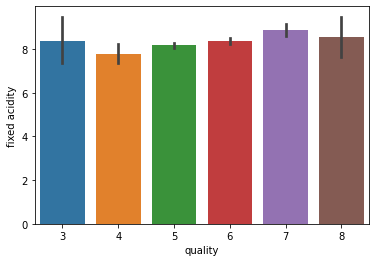

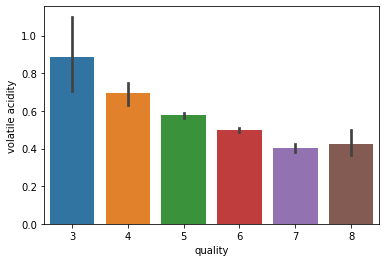

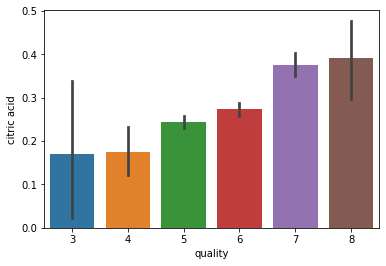

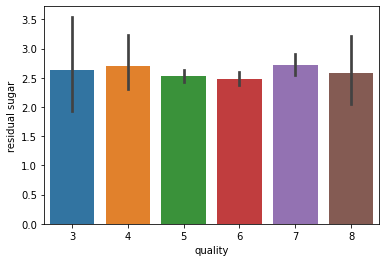

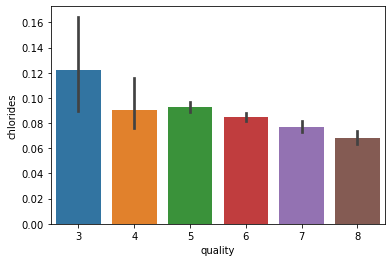

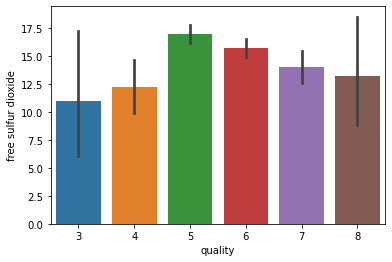

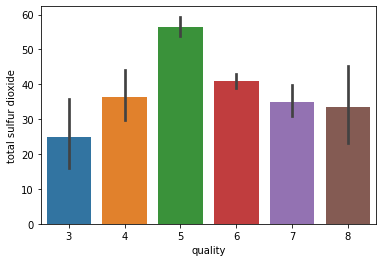

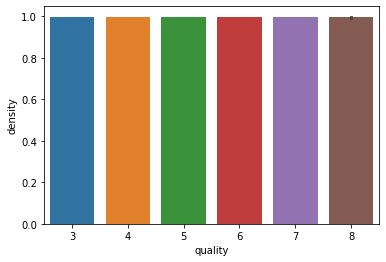

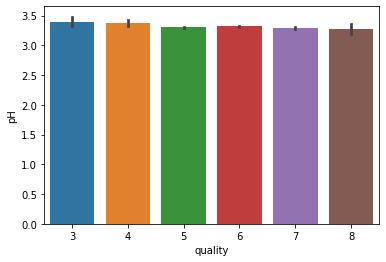

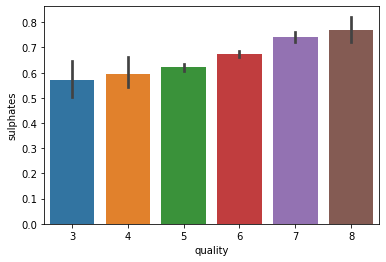

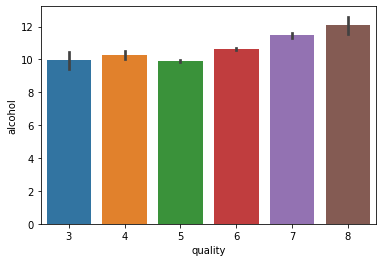

In [7]:
for i,cols in enumerate(data.columns[:-1]):
    plt.figure(i)
    sns.barplot(x=data['quality'], y=cols, data=data)
    
    

<AxesSubplot:>

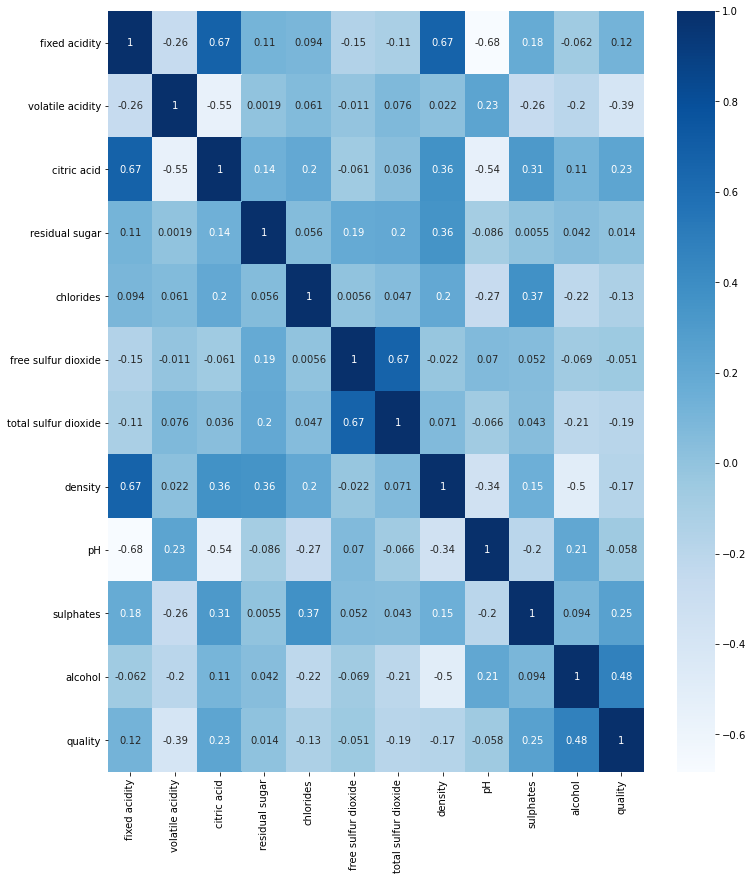

In [8]:
plt.figure(figsize=(12,14))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)

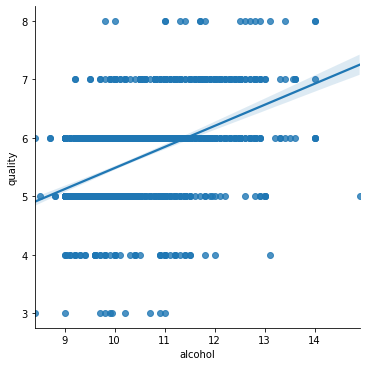

In [9]:
sns.lmplot(y='quality', x='alcohol',data=data)

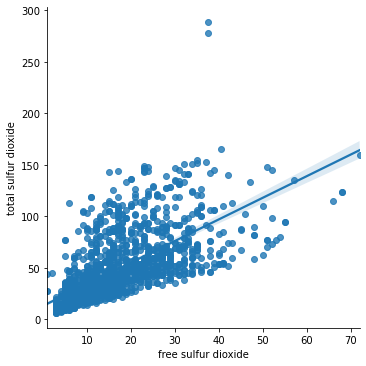

In [10]:
sns.lmplot(x='free sulfur dioxide', y='total sulfur dioxide',data=data)

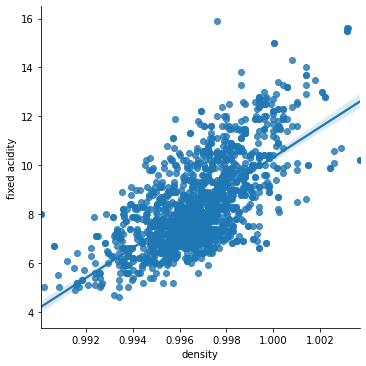

In [11]:
sns.lmplot(x='density',y='fixed acidity',data=data)

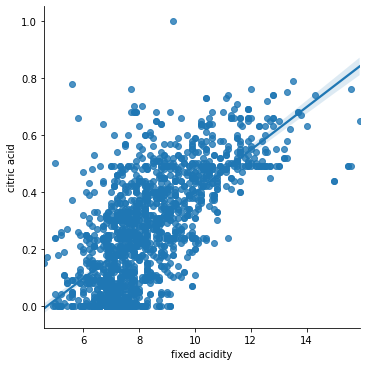

In [12]:
sns.lmplot(x='fixed acidity', y='citric acid',data=data)

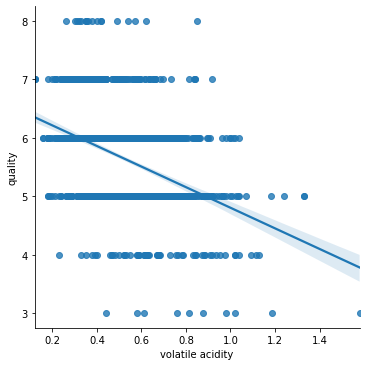

In [13]:
sns.lmplot(y='quality',x='volatile acidity',data=data)

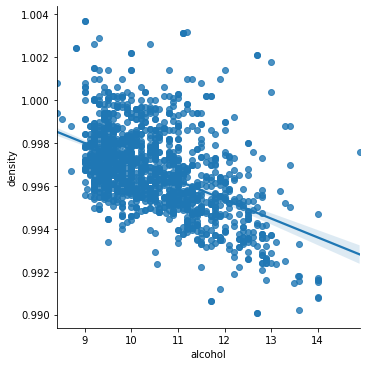

In [14]:
sns.lmplot(x='alcohol',y='density',data=data)

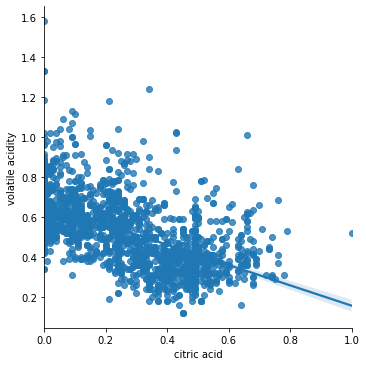

In [15]:
sns.lmplot(x='citric acid',y='volatile acidity',data=data)

In [16]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

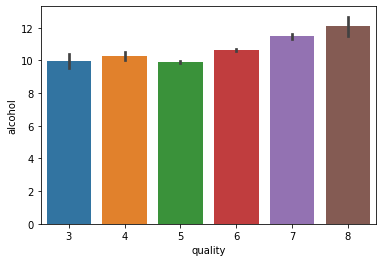

In [17]:
sns.barplot(data['quality'],data['alcohol'])

<AxesSubplot:xlabel='quality', ylabel='pH'>

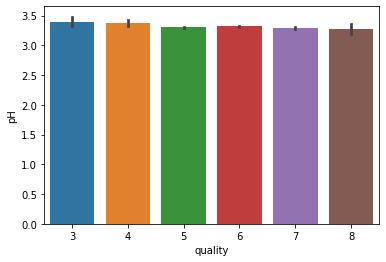

In [18]:
sns.barplot(data['quality'], data['pH'])

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

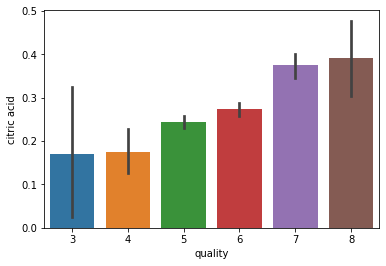

In [19]:
sns.barplot(data['quality'], data['citric acid'])

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

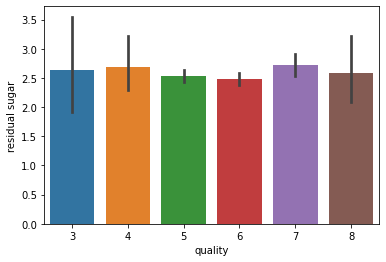

In [20]:
sns.barplot(data['quality'], data['residual sugar'])

<Figure size 720x864 with 0 Axes>

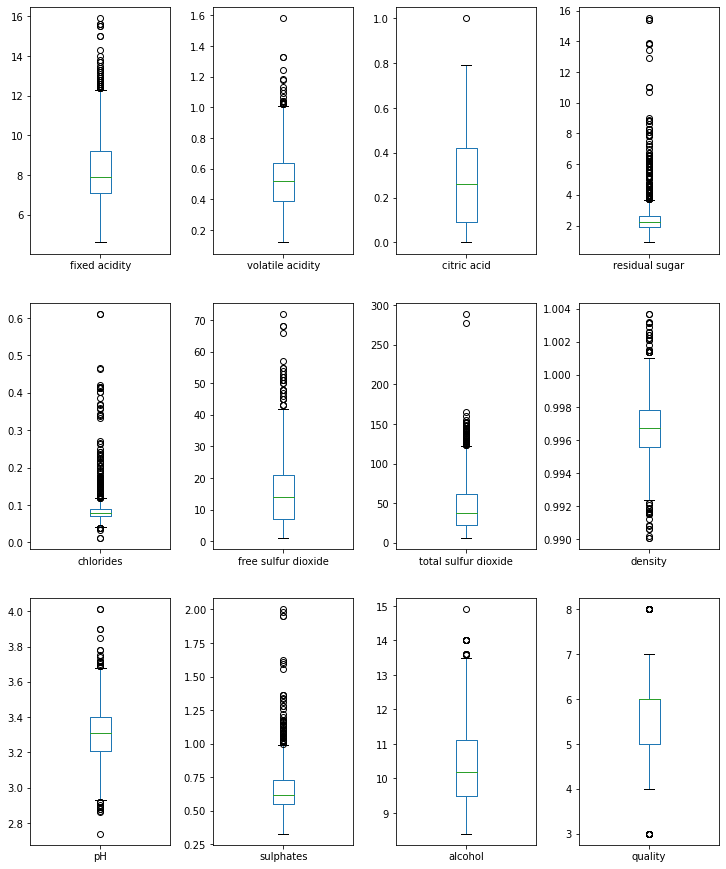

In [21]:
plt.figure(figsize=(10,12))
data.plot(kind ='box',subplots=True, layout = (3,4),figsize=(10,12))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

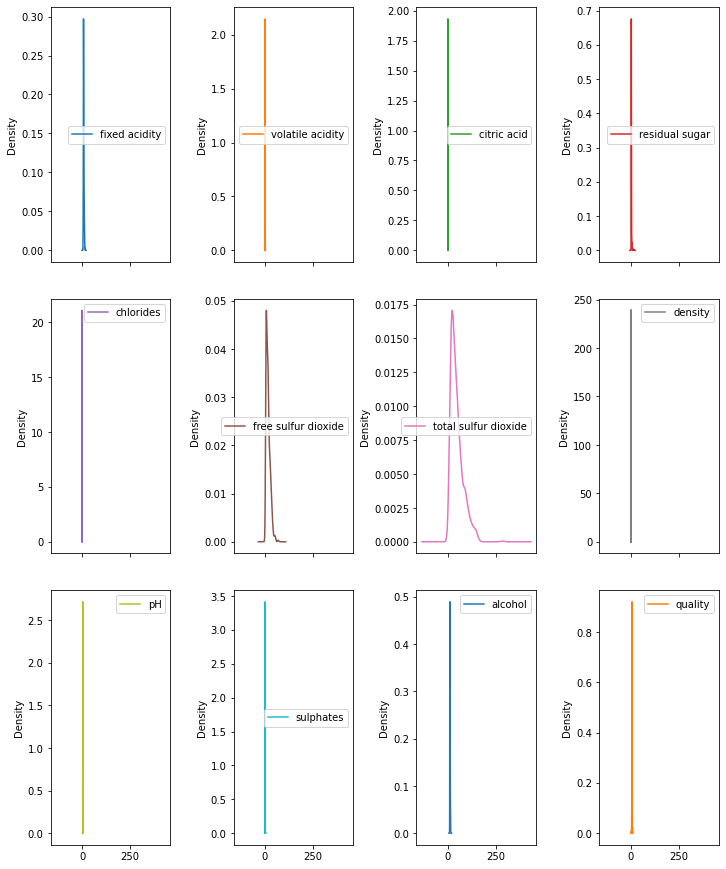

In [22]:
#checking skewnwess
data.plot(kind ='kde', subplots = True, layout=(3,4), figsize = (10,12))
plt.tight_layout(pad=0.4,w_pad=0.7,h_pad=3)

### Data Preprocessing

In [23]:
#Removing outliers
from scipy.stats import zscore
z = np.abs(zscore(data))

In [24]:
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [25]:
wine_data = data[(z<3).all(axis=1)]

In [26]:
print(data.shape, wine_data.shape)

(1599, 12) (1451, 12)


In [27]:
#Approximately 150 data's are outlier/abnormal
outliers = ((1599 - 1451)/1599)*100
print('{}% of dataset are outliers'.format(round(outliers,2)))

9.26% of dataset are outliers


<AxesSubplot:xlabel='quality', ylabel='count'>

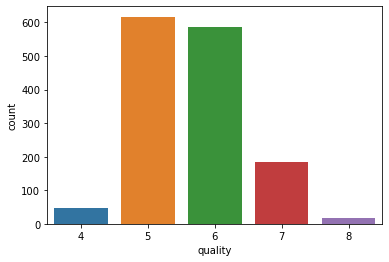

In [28]:
#data visuals for target variable 'quality'
sns.countplot(x = wine_data['quality'] )

In [29]:
wine_data['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [30]:
x_data = wine_data.iloc[:,:-1]
y_data = wine_data['quality']

In [63]:
x_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Categorising Quality of wine into good and bad

In [31]:
wine_data['quality'] = data.quality.apply(lambda x:1 if x>=7 else 0)

In [32]:
wine_data['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

In [33]:
x_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## Data Modelling

### Logistic Regression

In [52]:
log_reg = LogisticRegression()
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = i)
    log_reg.fit(X_train,Y_train)
    reg_pred = log_reg.predict(X_test)
    print('At random state:',i)
    print('Model Prediction on Training dataset:',round(log_reg.score(X_train,Y_train)*100,2))
    print('Model Prediction on Test Dataset:',round(accuracy_score(Y_test,reg_pred)*100,2))
    print(confusion_matrix(Y_test,reg_pred))
    print('\n')

At random state: 0
Model Prediction on Training dataset: 89.06
Model Prediction on Test Dataset: 87.6
[[299  10]
 [ 35  19]]


At random state: 1
Model Prediction on Training dataset: 88.79
Model Prediction on Test Dataset: 88.71
[[308  13]
 [ 28  14]]


At random state: 2
Model Prediction on Training dataset: 89.15
Model Prediction on Test Dataset: 87.88
[[299   6]
 [ 38  20]]


At random state: 3
Model Prediction on Training dataset: 88.14
Model Prediction on Test Dataset: 90.63
[[310   3]
 [ 31  19]]


At random state: 4
Model Prediction on Training dataset: 88.51
Model Prediction on Test Dataset: 87.88
[[302   8]
 [ 36  17]]


At random state: 5
Model Prediction on Training dataset: 88.24
Model Prediction on Test Dataset: 88.15
[[300   7]
 [ 36  20]]


At random state: 6
Model Prediction on Training dataset: 88.05
Model Prediction on Test Dataset: 87.6
[[304   7]
 [ 38  14]]


At random state: 7
Model Prediction on Training dataset: 89.06
Model Prediction on Test Dataset: 88.15
[[3

At random state: 64
Model Prediction on Training dataset: 89.71
Model Prediction on Test Dataset: 83.75
[[291  11]
 [ 48  13]]


At random state: 65
Model Prediction on Training dataset: 88.79
Model Prediction on Test Dataset: 88.71
[[304   7]
 [ 34  18]]


At random state: 66
Model Prediction on Training dataset: 88.6
Model Prediction on Test Dataset: 89.53
[[309   5]
 [ 33  16]]


At random state: 67
Model Prediction on Training dataset: 87.5
Model Prediction on Test Dataset: 90.91
[[315   9]
 [ 24  15]]


At random state: 68
Model Prediction on Training dataset: 88.14
Model Prediction on Test Dataset: 90.63
[[312   7]
 [ 27  17]]


At random state: 69
Model Prediction on Training dataset: 88.6
Model Prediction on Test Dataset: 88.71
[[309   8]
 [ 33  13]]


At random state: 70
Model Prediction on Training dataset: 87.78
Model Prediction on Test Dataset: 92.29
[[321   9]
 [ 19  14]]


At random state: 71
Model Prediction on Training dataset: 88.69
Model Prediction on Test Dataset: 89

Consider random_state=70

In [35]:
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape)

(1088, 11) (363, 11) (1088,) (363,)


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
print(confusion_matrix(Y_test,reg_pred))
print(classification_report(Y_test,reg_pred))

[[306  10]
 [ 32  15]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       316
           1       0.60      0.32      0.42        47

    accuracy                           0.88       363
   macro avg       0.75      0.64      0.68       363
weighted avg       0.87      0.88      0.87       363



In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

## GridSearchCV

### Decision Tree Classifier

In [39]:
dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy')

In [40]:
dtc_tuning.fit(x_data,y_data)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'splitter': 'random'}
0.8517999763005093


### MultionomialNB

In [41]:
mnb=MultinomialNB()
mnb_para = {'alpha':[1.0,0.1,0.01,0.001,0.0001,0],
            'fit_prior':[True,False]}
mnb_tuning = GridSearchCV(estimator = mnb, param_grid = mnb_para,cv=5)

In [42]:
mnb_tuning.fit(x_data,y_data)
print(mnb_tuning.best_params_)
print(mnb_tuning.best_score_)

{'alpha': 1.0, 'fit_prior': True}
0.6705012442232492


### KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(0,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para)
knn_tuning.fit(x_data,y_data)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.8552743216020856


### Support Vector Classifier

In [44]:
svc = SVC()
svc_para = {'C': [0.9,1,1.2],
            'kernel': ['rbf','poly','linear'],
            }
svc_tuning = GridSearchCV(estimator = svc, param_grid = svc_para)
svc_tuning.fit(x_data,y_data)
print(svc_tuning.best_params_)
print(svc_tuning.best_score_)

{'C': 1, 'kernel': 'linear'}
0.8656144092902002


### Random Forest Classifier

In [48]:
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10)
rfc_tuning.fit(x_data,y_data)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}
0.8897260273972603


### SGD Classifier

In [49]:
from sklearn.linear_model import SGDClassifier

In [51]:
sgd = SGDClassifier()
sgd_para = {'alpha': [1,0.1,0.01,0.001,0.0001,0],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV(estimator = sgd, param_grid = sgd_para, cv = 10)
sgd_tuning.fit(x_data,y_data)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.001, 'learning_rate': 'optimal', 'penalty': 'l2'}
0.8724799244213509


## Building Models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append('DTC', DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 4, splitter= 'random'))
models.append('MNB', MultinomialNB(alpha= 1.0, fit_prior= True))
models.append('KNN', KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors = 9, weights= 'uniform'))
models.append('SVC', SVC(C = 1, kernel= 'linear'))
models.appens('RFC', RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 200,max_depth = 10,bootstrap =True))
models.append('SGD', SGDClassifier(alpha = 0.001, learning_rate = 'optimal', penalty = 'l2'))

In [70]:
def build(model,x_data,y_data):
    X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=.25, random_state = 70)
    model.fit(X_train,Y_train)
    score = model.score(X_train, Y_train)
    model_predict = model.predict(X_test)
    print('Actual score:', score*100)
    print('Predicted Score:', accuracy_score(Y_test,model_predict)*100)
    
    cv_score = cross_val_score(model, x_data, y_data, cv=10)
    print('CV score:',cv_score.mean()*100)

In [71]:
model = LogisticRegression()
build(model,x_data,y_data)

Actual score: 87.77573529411765
Predicted Score: 92.28650137741047
CV score: 88.62966461974493


In [72]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_split= 4, splitter= 'random')
build(model,x_data,y_data)

Actual score: 97.97794117647058
Predicted Score: 89.80716253443526
CV score: 83.94048181388757


In [73]:
model = MultinomialNB(alpha= 1.0, fit_prior= True)
build(model,x_data,y_data)

Actual score: 67.09558823529412
Predicted Score: 63.91184573002755
CV score: 67.39489844119035


In [74]:
model = KNeighborsClassifier(algorithm = 'auto', metric = 'euclidean', n_neighbors = 9, weights= 'uniform')
build(model,x_data,y_data)

Actual score: 86.58088235294117
Predicted Score: 90.08264462809917
CV score: 84.90647142182335


In [75]:
model = SVC(C = 1, kernel= 'linear')
build(model,x_data,y_data)

Actual score: 85.56985294117648
Predicted Score: 91.18457300275482
CV score: 86.56117146905999


In [76]:
model = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 200,max_depth = 10,bootstrap =True)
build(model,x_data,y_data)

Actual score: 99.35661764705883
Predicted Score: 93.93939393939394
CV score: 88.21398205007085


In [77]:
model = SGDClassifier(alpha = 0.001, learning_rate = 'optimal', penalty = 'l2')
build(model,x_data,y_data)

Actual score: 85.56985294117648
Predicted Score: 92.56198347107438
CV score: 82.14690599905528


## AUC_ROC Curve of Best model (RFC):

<function matplotlib.pyplot.show(close=None, block=None)>

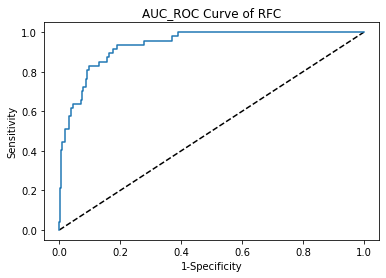

In [82]:
rfc = RandomForestClassifier(criterion = 'gini', max_features = 'auto', n_estimators = 200,max_depth = 10,bootstrap =True)
rfc.fit(X_train,Y_train)
probability_y_test = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test, probability_y_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('AUC_ROC Curve of RFC')
plt.show

## Saving the best model

In [83]:
import pickle
save_file = 'RFC_Practiceproject_3.pkl'
pickle.dump(rfc,open(save_file,'wb'))

load_file = pickle.load(open(save_file,'rb'))
pred = load_file.predict(X_test)
print(accuracy_score(Y_test,pred))

0.9146005509641874
